# **PREPARACIÓN DE DATOS**

A continuación realizamos el EDA (Exploratory Data Analysis) a través del cuál se realizará el proceso de análisis de datos que implica explorar y comprender de manera preliminar los datos del Clima y de fallas de manera independientes y enlazados, antes de aplicar técnicas estadísticas más avanzadas y/o modelos de machine learning. El objetivo principal de este EDA es obtener una comprensión inicial de los datos, identificar patrones, tendencias, relaciones y posibles anomalías en los mismos.

In [ ]:
!pip install ydata_profiling

In [ ]:
!pip install --upgrade typing-extensions ydata_profiling

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Ruta a la carpeta en Google Drive
folder_path = "/content/drive/MyDrive/Proyecto_de_Grado/Datasets/DS_Finales"

# Cambia el directorio actual al de la carpeta
os.chdir(folder_path)

# Lista el contenido de la carpeta
!ls

'Copia de DATASET_FALLAS_-_PROCESADO_PRUEBA.xlsx'   DATASET_FALLAS_-_PROCESADO_V2.xlsx
 data_clima_preprocesada_v2.csv			    DATASET_FALLAS_-_PROCESADO.xlsx


In [ ]:
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Integración**

A continuación realizaremos la integración de datos entre el dataset de datos climatologicos y el dataset de datos de fallas y aperturas, cuyo objetivo es el de combinar estos datos para dejarlos en un repositorio unificado y así dejarlos listos para la ralización del el análisis que permitirá tener una vista más completa y coherente de la información en pro de la toma de decisiones informadas.

A continuación las consideraciones a tener en cuenta:

Procedemos a cargar los dos datasets para realizar una integración, sin embargo, antes de la integración realizaremos una definición de tipos de variables para no tener inconvenientes al momento de realizar la unión, por otra parte; se realizarán unas pequeñas modificaciones a los nombres de las variables para así poder tratar las mismas:

In [ ]:
#Cargamos los datos de clima
data1 = pd.read_csv('data_clima_preprocesada_v2.csv')
data1

,Fecha,Municipio,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio
0,2021-01-01,BUENAVISTA,22.595341,0.0,0.484968
1,2021-01-01,PIJAO,19.176854,0.0,0.181213
2,2021-01-01,MONTENEGRO,21.302405,0.0,0.091502
3,2021-01-01,CALARCÁ,19.753454,0.1,0.423901
4,2021-01-01,SALENTO,19.753454,0.0,0.630358
...,...,...,...,...,...
4550,2023-06-30,BUENAVISTA,23.485500,0.0,0.390992
4551,2023-06-30,PIJAO,19.753454,0.0,0.630358
4552,2023-06-30,MONTENEGRO,23.762355,0.0,0.395914
4553,2023-06-30,CALARCÁ,19.753454,0.0,0.630358


Observamos la estructura (metadata) del dataset del clima procesado:

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      4555 non-null   object 
 1   Municipio                  4555 non-null   object 
 2   Temperatura_promedio       4555 non-null   float64
 3   Precipitacion_acumulada    4555 non-null   float64
 4   Velocidad_viento_promedio  4555 non-null   float64
dtypes: float64(3), object(2)
memory usage: 178.1+ KB


De lo anterior se puede apreciar que:
- Se cuenta 4.555 registros, los cuales corresponden 911 registros por cada uno de los 5 municipios: PIJAO, BUENAVISTA, MONTENEGRO, CALARCÁ, y SALENTO para los 2 años y medio comprendidos entre 01/01/2021 y el 30/06/2023.
- Se evidencia que los valores del campo "Fecha" se marcan de tipo "Object" **lo cual se debe correjir.**
- Se evidencia que los valores del campo "Municipio" también se marcan de tipo "Object" **lo cual se debe correjir**.
- Se evidencia que los valores del campo "Temperatura_promedio" se marcan de tipo: float64 lo cual es correcto y se debe conservar.
- Se evidencia que los valores del campo "Precipitacion_promedio" se marcan de tipo: float64 lo cual es correcto y se debe conservar.
- Se evidencia que los valores del campo "Velocidad_viento_promedio" se marcan de tipo: float64 lo cual es correcto y se debe conservar.

- Se define el campo "Fecha" de tipo -> **datatime** para su futuro procesamiento.
- Se define el campo "Municipio" de tipo -> **category** para su futuro procesamiento.

In [ ]:
#Definimos los tipos de datos del dataset clima
data1['Fecha'] = pd.to_datetime(data1['Fecha'])
data1['Municipio'] = data1['Municipio'].astype('category')

Validamos nuevamente que todos y cada uno de los campos del clima se encuentre con su tipo de datos correcto:

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha                      4555 non-null   datetime64[ns]
 1   Municipio                  4555 non-null   category      
 2   Temperatura_promedio       4555 non-null   float64       
 3   Precipitacion_acumulada    4555 non-null   float64       
 4   Velocidad_viento_promedio  4555 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3)
memory usage: 147.1 KB


Validamos que los únicos municipios con los cuales vamos a operar son: PIJAO, BUENAVISTA, MONTENEGRO, CALARCÁ, y SALENTO.

In [ ]:
#Verificamos los municipos únicos
data1['Municipio'].unique()

['BUENAVISTA', 'PIJAO', 'MONTENEGRO', 'CALARCÁ', 'SALENTO']
Categories (5, object): ['BUENAVISTA', 'CALARCÁ', 'MONTENEGRO', 'PIJAO', 'SALENTO']

Se procede a reemplazar el nombre del múnicipio de: "CALARCÁ" (Que considera tilde en la última letra) por "CALARCA" (Sin considerar la tilde en la última letra) con el objetivo que no incurrir en inconsistencias a futuro a causa de la no consideración de la codificación UTF8 en los elementos de Python, como lo son: Listas, tablas y gráficas.

In [ ]:
#Quitamos la tilde del municipio de Calarcá para evitar posibles errores al graficar
data1['Municipio'] = data1['Municipio'].replace({'CALARCÁ': 'CALARCA'})

Validamos que el cambio anterior haya tenido efecto:

In [ ]:
data1['Municipio'].unique()

['BUENAVISTA', 'PIJAO', 'MONTENEGRO', 'CALARCA', 'SALENTO']
Categories (5, object): ['BUENAVISTA', 'CALARCA', 'MONTENEGRO', 'PIJAO', 'SALENTO']

Habiendo realizado los ajustes preliminares al dataset del clima procesado; se procede a raelizar el cargue del dataset de fallas procesado para de igual manera realizar su respectiva depuración:

In [ ]:
#Cargamos el dataset de las fallas
data2 = pd.read_excel('DATASET_FALLAS_-_PROCESADO_V2.xlsx')
data2

,FECHA_INICIO,FECHA_FIN,MUNICIPIO,ZONA
0,2023-06-30 21:13:00,2023-07-01 10:44:00,CALARCÃ_x0081_,U
1,2023-06-30 20:48:00,2023-07-02 07:48:00,CALARCÃ_x0081_,R
2,2023-06-30 18:41:00,2023-07-03 07:03:00,MONTENEGRO,U
3,2023-06-30 17:46:00,2023-07-03 12:59:00,CALARCÃ_x0081_,U
4,2023-06-30 17:04:00,2023-07-01 07:53:00,MONTENEGRO,U
...,...,...,...,...
14950,2021-01-01 16:21:00,2021-01-01 18:15:00,SALENTO,R
14951,2021-01-01 16:13:00,2021-01-01 18:16:00,SALENTO,R
14952,2021-01-01 15:14:00,2021-01-09 14:22:00,SALENTO,R
14953,2021-01-01 10:36:00,2021-01-01 15:39:00,PIJAO,R


Revisamos la estructura del dataset de fallas cargado:

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14955 entries, 0 to 14954
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA_INICIO  14955 non-null  datetime64[ns]
 1   FECHA_FIN     14955 non-null  datetime64[ns]
 2   MUNICIPIO     14955 non-null  object        
 3   ZONA          14955 non-null  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 467.5+ KB


Se evidencia que los tipos de datos de las variables: *MUNICIPIO* y *ZONA* se encuentran configurados de tipo "Objetc" lo cual es una inconsistencia y amerita ajuste a tipo "category":

In [ ]:
#Definimos los tipos de datos del dataset de fallas
data2['MUNICIPIO'] = data2['MUNICIPIO'].astype('category')
data2['ZONA'] = data2['ZONA'].astype('category')

Validamos nuevamente la estructura del dataset para comprobar que los cambios de tipo de variables hayan tenido efecto:

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14955 entries, 0 to 14954
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA_INICIO  14955 non-null  datetime64[ns]
 1   FECHA_FIN     14955 non-null  datetime64[ns]
 2   MUNICIPIO     14955 non-null  category      
 3   ZONA          14955 non-null  category      
dtypes: category(2), datetime64[ns](2)
memory usage: 263.3 KB


Se realiza ordenamiento del dataset por "FECHA_INICIO" para mejor visualización y comprensión:

In [ ]:
data2 = data2.sort_values(by = 'FECHA_INICIO', ascending=True)
data2

,FECHA_INICIO,FECHA_FIN,MUNICIPIO,ZONA
14954,2021-01-01 10:31:00,2021-01-01 10:54:00,SALENTO,U
14953,2021-01-01 10:36:00,2021-01-01 15:39:00,PIJAO,R
14952,2021-01-01 15:14:00,2021-01-09 14:22:00,SALENTO,R
14951,2021-01-01 16:13:00,2021-01-01 18:16:00,SALENTO,R
14950,2021-01-01 16:21:00,2021-01-01 18:15:00,SALENTO,R
...,...,...,...,...
4,2023-06-30 17:04:00,2023-07-01 07:53:00,MONTENEGRO,U
3,2023-06-30 17:46:00,2023-07-03 12:59:00,CALARCÃ_x0081_,U
2,2023-06-30 18:41:00,2023-07-03 07:03:00,MONTENEGRO,U
1,2023-06-30 20:48:00,2023-07-02 07:48:00,CALARCÃ_x0081_,R


Verificamos el valor MÁXIMO y el valor MÍNIMO del dataset de fallas con el objetivo de comprobar que los valores se encuentren aproximados al intervalo de tiempo intencionalmente seleccionado desde el: 2022/01/01 y el 2023/06/30:

In [ ]:
#Verificamos el rango de fechas
print(data2['FECHA_INICIO'].min())
print(data2['FECHA_INICIO'].max())

2021-01-01 10:31:00
2023-06-30 21:13:00


Validamos que los únicos municipios con los cuales vamos a operar sean unicamente: PIJAO, BUENAVISTA, MONTENEGRO, CALARCÁ, y SALENTO:

In [ ]:
#Verificamos los municipios
data2['MUNICIPIO'].unique()

['SALENTO', 'PIJAO', 'MONTENEGRO', 'CALARCÃ_x0081_', 'BUENAVISTA']
Categories (5, object): ['BUENAVISTA', 'CALARCÃ_x0081_', 'MONTENEGRO', 'PIJAO', 'SALENTO']

Nuevamente Se procede a reemplazar el nombre del múnicipio de: "CALARCÁ" (Que considera tilde en la última letra) por "CALARCA" (Sin considerar la tilde en la última letra) con el objetivo que no incurrir en inconsistencias a futuro a causa de la no consideración de la codificación UTF8 en los elementos de Python, como lo son: Listas, tablas y gráficas.

In [ ]:
#Reemplazamos el nombre del municipio de Calarcá al igual que los datos del clima
data2['MUNICIPIO'] = data2['MUNICIPIO'].replace({'CALARCÃ_x0081_' : 'CALARCA'})

Validamos que el cambio anterior haya tenido efecto:

In [ ]:
data2['MUNICIPIO'].unique()

['SALENTO', 'PIJAO', 'MONTENEGRO', 'CALARCA', 'BUENAVISTA']
Categories (5, object): ['BUENAVISTA', 'CALARCA', 'MONTENEGRO', 'PIJAO', 'SALENTO']

Creamos la nueva columna "Duracion_Falla" con el objetivo de proximamente tomarla como referencia para la categorización de la variable objetivo de la clarificación:

In [ ]:
#Creamos Variable de duración de fallas
data2['Duracion_Falla'] = data2['FECHA_FIN'] - data2['FECHA_INICIO']
data2.head()

,FECHA_INICIO,FECHA_FIN,MUNICIPIO,ZONA,Duracion_Falla
14954,2021-01-01 10:31:00,2021-01-01 10:54:00,SALENTO,U,0 days 00:23:00
14953,2021-01-01 10:36:00,2021-01-01 15:39:00,PIJAO,R,0 days 05:03:00
14952,2021-01-01 15:14:00,2021-01-09 14:22:00,SALENTO,R,7 days 23:08:00
14951,2021-01-01 16:13:00,2021-01-01 18:16:00,SALENTO,R,0 days 02:03:00
14950,2021-01-01 16:21:00,2021-01-01 18:15:00,SALENTO,R,0 days 01:54:00


Realizamos la creación de una nueva columna: "Duracion_Falla_Horas" de manera tal que se ajusta la variable creada más arriba con nombre: "Duracion_Falla" para que el valor resultado sea en horas para una más facil comprensión y posterior uso:

In [ ]:
data2['Duracion_Falla_Horas'] = data2['Duracion_Falla'].dt.total_seconds() / 3600

In [ ]:
data2

,FECHA_INICIO,FECHA_FIN,MUNICIPIO,ZONA,Duracion_Falla,Duracion_Falla_Horas
14954,2021-01-01 10:31:00,2021-01-01 10:54:00,SALENTO,U,0 days 00:23:00,0.383333
14953,2021-01-01 10:36:00,2021-01-01 15:39:00,PIJAO,R,0 days 05:03:00,5.050000
14952,2021-01-01 15:14:00,2021-01-09 14:22:00,SALENTO,R,7 days 23:08:00,191.133333
14951,2021-01-01 16:13:00,2021-01-01 18:16:00,SALENTO,R,0 days 02:03:00,2.050000
14950,2021-01-01 16:21:00,2021-01-01 18:15:00,SALENTO,R,0 days 01:54:00,1.900000
...,...,...,...,...,...,...
4,2023-06-30 17:04:00,2023-07-01 07:53:00,MONTENEGRO,U,0 days 14:49:00,14.816667
3,2023-06-30 17:46:00,2023-07-03 12:59:00,CALARCA,U,2 days 19:13:00,67.216667
2,2023-06-30 18:41:00,2023-07-03 07:03:00,MONTENEGRO,U,2 days 12:22:00,60.366667
1,2023-06-30 20:48:00,2023-07-02 07:48:00,CALARCA,R,1 days 11:00:00,35.000000


Validamos nuevamente la estructura del dataset de fallas evidenciado que la última variable creda queda en el formato correspondiente (float64), mientras que la creada previamente se creo uno un poco más dificil de manipular (timedelta64):

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14955 entries, 14954 to 0
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   FECHA_INICIO          14955 non-null  datetime64[ns] 
 1   FECHA_FIN             14955 non-null  datetime64[ns] 
 2   MUNICIPIO             14955 non-null  category       
 3   ZONA                  14955 non-null  category       
 4   Duracion_Falla        14955 non-null  timedelta64[ns]
 5   Duracion_Falla_Horas  14955 non-null  float64        
dtypes: category(2), datetime64[ns](2), float64(1), timedelta64[ns](1)
memory usage: 613.7 KB


Revisamos duplicidad de registros:

In [ ]:
data2[data2.duplicated()]

,FECHA_INICIO,FECHA_FIN,MUNICIPIO,ZONA,Duracion_Falla,Duracion_Falla_Horas
14946,2021-01-02 17:29:00,2021-01-02 19:14:00,MONTENEGRO,R,0 days 01:45:00,1.750000
14912,2021-01-04 00:06:00,2021-01-07 06:00:00,SALENTO,R,3 days 05:54:00,77.900000
14910,2021-01-04 00:06:00,2021-01-05 19:57:00,SALENTO,R,1 days 19:51:00,43.850000
14908,2021-01-04 00:06:00,2021-01-05 19:46:00,CALARCA,R,1 days 19:40:00,43.666667
14901,2021-01-04 00:06:00,2021-01-04 19:45:00,SALENTO,R,0 days 19:39:00,19.650000
...,...,...,...,...,...,...
61,2023-06-29 11:19:00,2023-06-29 11:22:00,SALENTO,R,0 days 00:03:00,0.050000
47,2023-06-29 14:40:00,2023-06-30 10:35:00,SALENTO,R,0 days 19:55:00,19.916667
46,2023-06-29 14:40:00,2023-06-30 10:35:00,SALENTO,R,0 days 19:55:00,19.916667
45,2023-06-29 14:40:00,2023-06-30 10:35:00,SALENTO,R,0 days 19:55:00,19.916667


Se realiza actualización del dataset de manera tal que en la nueva versión se realiza exclusión de los registros duplicados:

In [ ]:
#Eliminamos filas duplicadas del dataset, manteniendo una solo instancia de cada fila duplicada
data2 = data2.drop_duplicates()
data2.head()

,FECHA_INICIO,FECHA_FIN,MUNICIPIO,ZONA,Duracion_Falla,Duracion_Falla_Horas
14954,2021-01-01 10:31:00,2021-01-01 10:54:00,SALENTO,U,0 days 00:23:00,0.383333
14953,2021-01-01 10:36:00,2021-01-01 15:39:00,PIJAO,R,0 days 05:03:00,5.050000
14952,2021-01-01 15:14:00,2021-01-09 14:22:00,SALENTO,R,7 days 23:08:00,191.133333
14951,2021-01-01 16:13:00,2021-01-01 18:16:00,SALENTO,R,0 days 02:03:00,2.050000
14950,2021-01-01 16:21:00,2021-01-01 18:15:00,SALENTO,R,0 days 01:54:00,1.900000


Se realiza nuevamente validación de registros duplicados, validación en la cual se logra evidenciar ausencia de estos en la nueva versión del dataset:

In [ ]:
data2[data2.duplicated()]

,FECHA_INICIO,FECHA_FIN,MUNICIPIO,ZONA,Duracion_Falla,Duracion_Falla_Horas


Como en neustro caso de estudio se trabajará con información diaria (tanto del clima como de las fallas) se realiza ajuste sobre el campo "FECHA_INICIO" se suprime el valor de las horas, minutos y segundos de manera que sólo se considere el año, mes y día y así poder realizar match entre los dataset por día:

In [ ]:
#Quitamos las horas y minutos a la fecha de inicio,  la cual servirá como indice de unión
data2['FECHA_INICIO'] = pd.to_datetime(data2['FECHA_INICIO']).dt.date
data2['FECHA_INICIO'] = pd.to_datetime(data2['FECHA_INICIO'])
data2

<ipython-input-326-aed28829f2f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['FECHA_INICIO'] = pd.to_datetime(data2['FECHA_INICIO']).dt.date
<ipython-input-326-aed28829f2f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['FECHA_INICIO'] = pd.to_datetime(data2['FECHA_INICIO'])


,FECHA_INICIO,FECHA_FIN,MUNICIPIO,ZONA,Duracion_Falla,Duracion_Falla_Horas
14954,2021-01-01,2021-01-01 10:54:00,SALENTO,U,0 days 00:23:00,0.383333
14953,2021-01-01,2021-01-01 15:39:00,PIJAO,R,0 days 05:03:00,5.050000
14952,2021-01-01,2021-01-09 14:22:00,SALENTO,R,7 days 23:08:00,191.133333
14951,2021-01-01,2021-01-01 18:16:00,SALENTO,R,0 days 02:03:00,2.050000
14950,2021-01-01,2021-01-01 18:15:00,SALENTO,R,0 days 01:54:00,1.900000
...,...,...,...,...,...,...
4,2023-06-30,2023-07-01 07:53:00,MONTENEGRO,U,0 days 14:49:00,14.816667
3,2023-06-30,2023-07-03 12:59:00,CALARCA,U,2 days 19:13:00,67.216667
2,2023-06-30,2023-07-03 07:03:00,MONTENEGRO,U,2 days 12:22:00,60.366667
1,2023-06-30,2023-07-02 07:48:00,CALARCA,R,1 days 11:00:00,35.000000


Se realiza validación de estructura del dataset:

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13227 entries, 14954 to 0
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   FECHA_INICIO          13227 non-null  datetime64[ns] 
 1   FECHA_FIN             13227 non-null  datetime64[ns] 
 2   MUNICIPIO             13227 non-null  category       
 3   ZONA                  13227 non-null  category       
 4   Duracion_Falla        13227 non-null  timedelta64[ns]
 5   Duracion_Falla_Horas  13227 non-null  float64        
dtypes: category(2), datetime64[ns](2), float64(1), timedelta64[ns](1)
memory usage: 542.8 KB


Se reajusta nombre de los campos así:

* Campo "FECHA_INICIO" por "Fecha".
* Campo "FECHA_FIN" por "Fecha_Fin".
* Campo "DURACION" por "Duración".
* Campo "MUNICIPIO" por "Municipio".
* Campo "ZONA" por "Zona".

In [ ]:
#Renombramos columnas del datset
data2.columns = ['Fecha',	'Fecha_Fin',	'Municipio',	'Zona', 'Duracion_Falla', 'Duracion_Falla_Horas']
data2.head()

,Fecha,Fecha_Fin,Municipio,Zona,Duracion_Falla,Duracion_Falla_Horas
14954,2021-01-01,2021-01-01 10:54:00,SALENTO,U,0 days 00:23:00,0.383333
14953,2021-01-01,2021-01-01 15:39:00,PIJAO,R,0 days 05:03:00,5.050000
14952,2021-01-01,2021-01-09 14:22:00,SALENTO,R,7 days 23:08:00,191.133333
14951,2021-01-01,2021-01-01 18:16:00,SALENTO,R,0 days 02:03:00,2.050000
14950,2021-01-01,2021-01-01 18:15:00,SALENTO,R,0 days 01:54:00,1.900000


Mediante un diagrama de Cajas y bigotes validamos valores atipicos evidenciando alguos valores desproporcioados (Visualmente):

<Axes: >

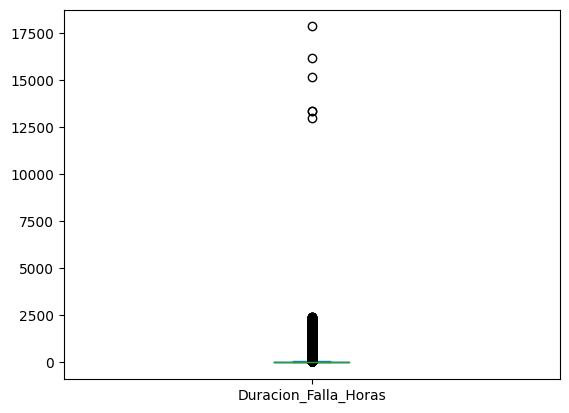

In [ ]:
#Verificamos valores atípicos en la duración de fallas antes de unir el dataset
data2['Duracion_Falla_Horas'].plot.box()

Para resolver lo anteiror; imputamos valores atípicos que estan por encima de 24 horas con la media, antes de unir los datasets:

In [ ]:
#calculamos la media de los valores menores o iguales a 24 horas
media_menor_24 = data2[data2['Duracion_Falla_Horas'] <= 24]['Duracion_Falla_Horas'].mean()

# identificamos los valores que exceden las 48 horas
atipicos = data2['Duracion_Falla_Horas'] > 24

#Actualizamos los valores que exceden 48 horas con la media calculada
data2.loc[atipicos, 'Duracion_Falla_Horas'] = media_menor_24

data2

,Fecha,Fecha_Fin,Municipio,Zona,Duracion_Falla,Duracion_Falla_Horas
14954,2021-01-01,2021-01-01 10:54:00,SALENTO,U,0 days 00:23:00,0.383333
14953,2021-01-01,2021-01-01 15:39:00,PIJAO,R,0 days 05:03:00,5.050000
14952,2021-01-01,2021-01-09 14:22:00,SALENTO,R,7 days 23:08:00,8.411644
14951,2021-01-01,2021-01-01 18:16:00,SALENTO,R,0 days 02:03:00,2.050000
14950,2021-01-01,2021-01-01 18:15:00,SALENTO,R,0 days 01:54:00,1.900000
...,...,...,...,...,...,...
4,2023-06-30,2023-07-01 07:53:00,MONTENEGRO,U,0 days 14:49:00,14.816667
3,2023-06-30,2023-07-03 12:59:00,CALARCA,U,2 days 19:13:00,8.411644
2,2023-06-30,2023-07-03 07:03:00,MONTENEGRO,U,2 days 12:22:00,8.411644
1,2023-06-30,2023-07-02 07:48:00,CALARCA,R,1 days 11:00:00,8.411644


Nuevamente mediante un diagrama de Cajas y bigotes validamos nuevamente valores atipicos evidenciando  valores proporcioados (Visualmente) gracias a la imputación anteriormente realizada:

<Axes: >

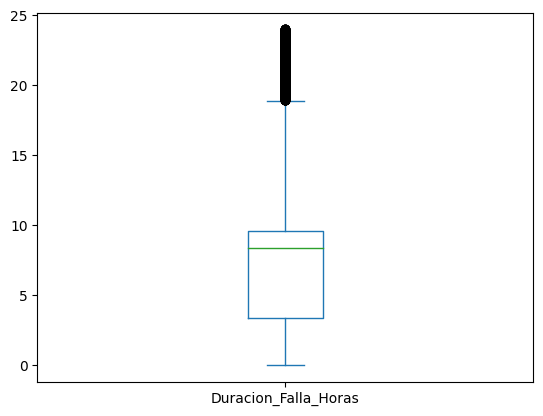

In [ ]:
data2['Duracion_Falla_Horas'].plot.box()

En pro de obtener una mejor correlación más adelante y comprendiendo la naturaleza de nuetros datos; debido a que hay multiples fallas en un día y solo tenemos un dato de temperaratura por día, por lo cual se toma la desición de realizar un promedio de fallas por día para tener un único dato cada día:

In [ ]:
#Agrupamos los datos por 'Municipio' y 'Fecha' y zona y se calcula el promedio de 'Duracion_Falla_Horas'
data2 = data2.groupby(['Municipio', 'Fecha', 'Zona'])['Duracion_Falla_Horas'].mean().reset_index()
data2

,Municipio,Fecha,Zona,Duracion_Falla_Horas
0,BUENAVISTA,2021-01-01,R,NaN
1,BUENAVISTA,2021-01-01,U,NaN
2,BUENAVISTA,2021-01-02,R,NaN
3,BUENAVISTA,2021-01-02,U,NaN
4,BUENAVISTA,2021-01-03,R,2.983333
...,...,...,...,...
9105,SALENTO,2023-06-28,U,NaN
9106,SALENTO,2023-06-29,R,8.938052
9107,SALENTO,2023-06-29,U,NaN
9108,SALENTO,2023-06-30,R,4.837500


Se procede a realizar la union entre los dataset: "data1": **Clima** y "data2": **Fallas** mediante un join de tipo outer con el objetivo de no perder registros en ningún frente:

In [ ]:
df_proyecto = data2.merge(data1, on = ['Municipio', 'Fecha'], how = 'outer')
df_proyecto

,Municipio,Fecha,Zona,Duracion_Falla_Horas,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio
0,BUENAVISTA,2021-01-01,R,NaN,22.595341,0.0,0.484968
1,BUENAVISTA,2021-01-01,U,NaN,22.595341,0.0,0.484968
2,BUENAVISTA,2021-01-02,R,NaN,22.728057,0.0,0.428398
3,BUENAVISTA,2021-01-02,U,NaN,22.728057,0.0,0.428398
4,BUENAVISTA,2021-01-03,R,2.983333,20.961357,22.3,0.494128
...,...,...,...,...,...,...,...
9105,SALENTO,2023-06-28,U,NaN,19.753454,0.0,0.630358
9106,SALENTO,2023-06-29,R,8.938052,19.753454,0.0,0.630358
9107,SALENTO,2023-06-29,U,NaN,19.753454,0.0,0.630358
9108,SALENTO,2023-06-30,R,4.837500,19.753454,0.0,0.630358


## **Selección de Variables**

A continuación se realiza el proceso de selección de variables el cual tiene como objetivo identificar y elegir las variables más relevantes y significativas para un análisis o modelo de datos y abonarle a la calidad y la eficacia de los resultados finales.

Para el caso de estudio la variable Fecha_Fin es irrelevante, por esta razón se dejo por fuera en la duracion media de las fallas por día y municipio, al igual que la variable Fecha, sin embargo, esta última no será eliminada por el momento porque será útil para realizar algunas visualizaciones más adelante y será eliminada la variable 'duracion_falla', la cual fue reemplazada por duracion_falla_horas.

## **Descripción Estadistica**

Procedemos a realizar una descripción estadistica básica de nuestro nuevo dataset, evidenciado que se cuentan con:

In [ ]:
df_proyecto.describe()

,Duracion_Falla_Horas,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio
count,4804.000000,9110.000000,9110.000000,9110.000000
mean,8.333138,19.753454,5.209303,0.630358
std,5.199858,1.976460,11.597993,0.314681
min,0.000000,12.250000,0.000000,0.000000
25%,4.366667,18.653547,0.000000,0.440993
50%,8.268607,19.753454,0.200000,0.630358
75%,10.794381,21.054431,5.209303,0.711999
max,23.983333,29.368070,137.600000,2.006143


Se procede a realizar una revisión estadística a través de una diagrama de barras vertical por el campo: "Municipio":

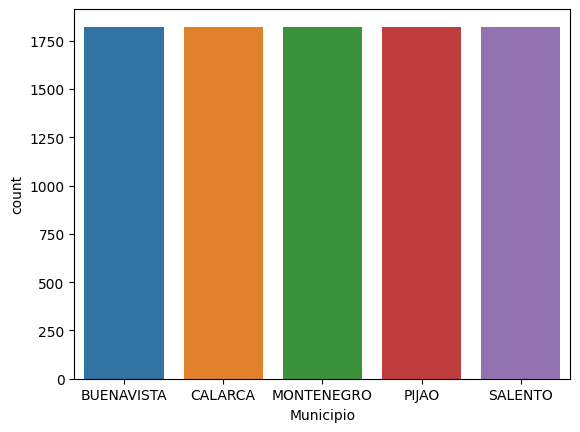

In [ ]:
sns.countplot(x='Municipio', data=df_proyecto)
plt.show()

En el anterior gráfico se puede observar que cada municipio tiene la misma cantidad de datos.

Se procede a realizar una revisión estadística a través de una diagrama de barras vertical por el campo: "Zona":

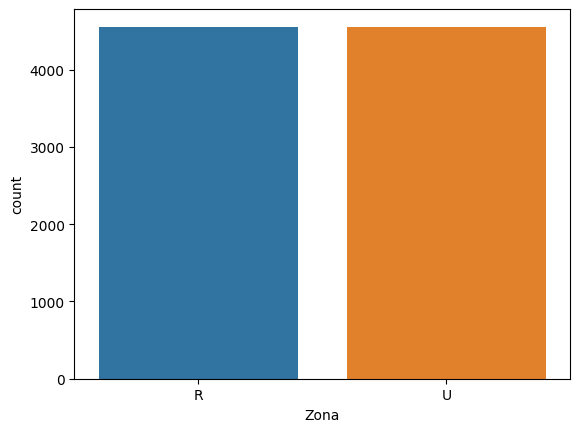

In [ ]:
sns.countplot(x='Zona', data=df_proyecto)
plt.show()

En el anterior gráfico se puede observar que cada tipo de Zona (Urbano y Rural) tiene la misma cantidad de datos.

A continuación se procede a realizar el proceso de limpieza de datos cuyo objetivo es garantizar que los datos utilizados en análisis, informes y aplicaciones sean más precisos, confiables y estén libres en la medida de lo posible; de errores, y así finalmente se puedan tomar decisiones informadas y obtener resultados más confiables.

## **Limpieza de atípicos**

En primera instanacia procedemos a graficar para identificar valores atípicos para las variables:

* Duracion_Falla_Horas.
* Temperatura_promedio.
* Precipitacion_acumulada.
* Velocidad_viento_promedio.

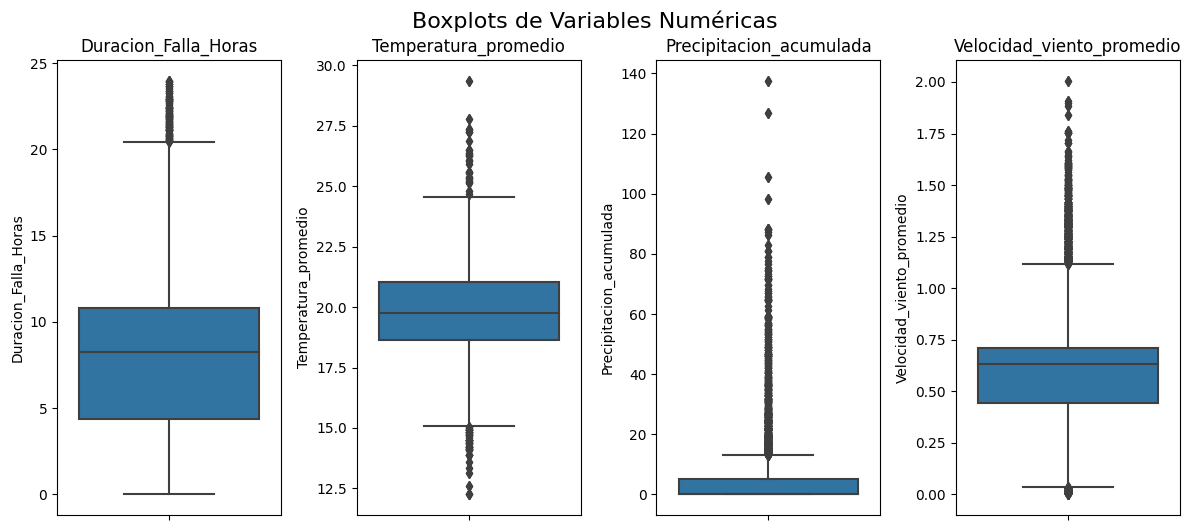

In [ ]:
# Variables numéricas a graficar
columnas_numericas = ['Duracion_Falla_Horas', 'Temperatura_promedio', 'Precipitacion_acumulada', 'Velocidad_viento_promedio']

# Calcula el número de filas y columnas necesarias
num_variables = len(columnas_numericas)
num_cols = 4  # Número de columnas en la figura
num_rows = (num_variables - 1) // num_cols + 1

# Crea una figura con subgráficos distribuidos en filas y columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5), squeeze=False)

# Itera a través de las columnas y crea un boxplot para cada una
for i, columna in enumerate(columnas_numericas):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df_proyecto, y=columna, ax=axes[row, col])
    axes[row, col].set_title(f'{columna}')

# Elimina los ejes vacíos si no se utilizan
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Boxplots de Variables Numéricas', fontsize=16, y=1.05)
plt.show()


De loa graficos se puede concluir que:
* Los valores atípicos de la duración de las fallas se imputaron en pasos anteriores.
* Los valores atípicos correspondiente al clima (Temperatura_promedio, Precipitacion_acumulada y Velocidad_viento_promedio) no se imputan porque no son errores en los datos.

## **Limpieza de Nulos**

En revisión realizada se tiene que si se evidencian valores nulos después de integrar los datasets de Fallas y Clima:

In [ ]:
df_proyecto

,Municipio,Fecha,Zona,Duracion_Falla_Horas,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio
0,BUENAVISTA,2021-01-01,R,NaN,22.595341,0.0,0.484968
1,BUENAVISTA,2021-01-01,U,NaN,22.595341,0.0,0.484968
2,BUENAVISTA,2021-01-02,R,NaN,22.728057,0.0,0.428398
3,BUENAVISTA,2021-01-02,U,NaN,22.728057,0.0,0.428398
4,BUENAVISTA,2021-01-03,R,2.983333,20.961357,22.3,0.494128
...,...,...,...,...,...,...,...
9105,SALENTO,2023-06-28,U,NaN,19.753454,0.0,0.630358
9106,SALENTO,2023-06-29,R,8.938052,19.753454,0.0,0.630358
9107,SALENTO,2023-06-29,U,NaN,19.753454,0.0,0.630358
9108,SALENTO,2023-06-30,R,4.837500,19.753454,0.0,0.630358


A raiz de lo anterior; a continuación se procede a realizar revisión de las cantidades exactas de valores nulos por cada una de las variables evidenciando 4.306 registros nulos en la variable "Duración_Fallas_Horas", y ningún valor nulo en los otros campos:

In [ ]:
df_proyecto.isnull().sum()

Municipio                       0
Fecha                           0
Zona                            0
Duracion_Falla_Horas         4306
Temperatura_promedio            0
Precipitacion_acumulada         0
Velocidad_viento_promedio       0
dtype: int64

In [ ]:
#Imputamos la variable Duracion_Falla_Horas con cero debido a que si no se registro valor en esas fechas es porque no hubo falla
df_proyecto['Duracion_Falla_Horas'] = df_proyecto['Duracion_Falla_Horas'].fillna(0)

Validamos nuevamente nulidad de datos por cada uno de los campos evidenciado ausencia de los mismos:

In [ ]:
df_proyecto.isnull().sum()

Municipio                    0
Fecha                        0
Zona                         0
Duracion_Falla_Horas         0
Temperatura_promedio         0
Precipitacion_acumulada      0
Velocidad_viento_promedio    0
dtype: int64

Observamos un panorama general de nuestro dataset:

In [ ]:
df_proyecto

,Municipio,Fecha,Zona,Duracion_Falla_Horas,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio
0,BUENAVISTA,2021-01-01,R,0.000000,22.595341,0.0,0.484968
1,BUENAVISTA,2021-01-01,U,0.000000,22.595341,0.0,0.484968
2,BUENAVISTA,2021-01-02,R,0.000000,22.728057,0.0,0.428398
3,BUENAVISTA,2021-01-02,U,0.000000,22.728057,0.0,0.428398
4,BUENAVISTA,2021-01-03,R,2.983333,20.961357,22.3,0.494128
...,...,...,...,...,...,...,...
9105,SALENTO,2023-06-28,U,0.000000,19.753454,0.0,0.630358
9106,SALENTO,2023-06-29,R,8.938052,19.753454,0.0,0.630358
9107,SALENTO,2023-06-29,U,0.000000,19.753454,0.0,0.630358
9108,SALENTO,2023-06-30,R,4.837500,19.753454,0.0,0.630358


## **Creación de nuevas variables**

Con la información de la variable 'Duracion_Falla_Horas', creamos nuestra variable objetivo de clasifiación, la cual definirá si de acuerdo a la duración requirió intervención humana es decir si fue considerada falla o no, toda vez que el dataset registra duraciones, lo anterior debido a que se registran duraciones de segundos pero el sistema corrigió automaticamente las fallas y no requirió de intervenciones

Para este proceso de definir si hubo falla o no se determina con los experto electrícos que una duración de 0.5 horas o mas requiere de intervención humana por ende se clasificará con Falla: SI, lo menor a este tiempo se claficara como No es decir no hubo falla.

In [ ]:
df_proyecto['Falla'] = ['SI' if tiempo > 0.5 else 'NO' for tiempo in df_proyecto['Duracion_Falla_Horas']]
df_proyecto

,Municipio,Fecha,Zona,Duracion_Falla_Horas,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,Falla
0,BUENAVISTA,2021-01-01,R,0.000000,22.595341,0.0,0.484968,NO
1,BUENAVISTA,2021-01-01,U,0.000000,22.595341,0.0,0.484968,NO
2,BUENAVISTA,2021-01-02,R,0.000000,22.728057,0.0,0.428398,NO
3,BUENAVISTA,2021-01-02,U,0.000000,22.728057,0.0,0.428398,NO
4,BUENAVISTA,2021-01-03,R,2.983333,20.961357,22.3,0.494128,SI
...,...,...,...,...,...,...,...,...
9105,SALENTO,2023-06-28,U,0.000000,19.753454,0.0,0.630358,NO
9106,SALENTO,2023-06-29,R,8.938052,19.753454,0.0,0.630358,SI
9107,SALENTO,2023-06-29,U,0.000000,19.753454,0.0,0.630358,NO
9108,SALENTO,2023-06-30,R,4.837500,19.753454,0.0,0.630358,SI


Se procede a realizar una revisión estadística a través de una diagrama de barras vertical por el campo: "Falla":

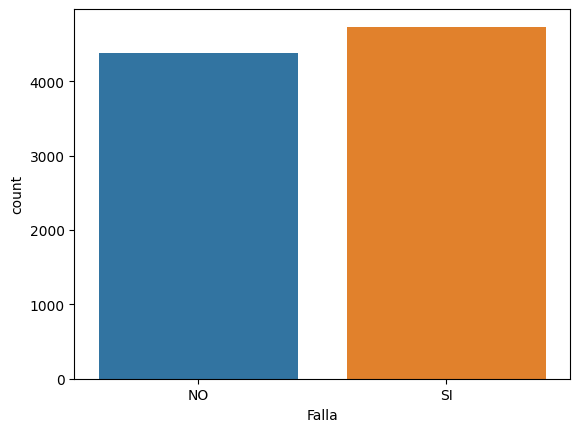

In [ ]:
sns.countplot(x='Falla', data=df_proyecto)
plt.show()

En el cual logramos evidenciar cantidades proporcionalmente muy similares.

Posterior a haber generado la variable objetivo categorica; se proceden a eliminar las variables:

* Fecha
* Duracion_Falla_Horas

Toda vez que las mismas ya no son necesarias para el analisis y trabajo venidero.

In [ ]:
#Ya realizadas la creacion de esta variable pordemos eliminar las variables 'Fecha' y 'Duracion_Falla_Horas'
df_proyecto.drop('Fecha', axis=1, inplace=True)
df_proyecto.drop('Duracion_Falla_Horas', axis=1, inplace=True)
df_proyecto.head()

,Municipio,Zona,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,Falla
0,BUENAVISTA,R,22.595341,0.0,0.484968,NO
1,BUENAVISTA,U,22.595341,0.0,0.484968,NO
2,BUENAVISTA,R,22.728057,0.0,0.428398,NO
3,BUENAVISTA,U,22.728057,0.0,0.428398,NO
4,BUENAVISTA,R,20.961357,22.3,0.494128,SI


Relizamos un revisión de la estructura del dataset para validar la eliminación de las variables anteriormente mencionadas:

In [ ]:
df_proyecto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9110 entries, 0 to 9109
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Municipio                  9110 non-null   category
 1   Zona                       9110 non-null   category
 2   Temperatura_promedio       9110 non-null   float64 
 3   Precipitacion_acumulada    9110 non-null   float64 
 4   Velocidad_viento_promedio  9110 non-null   float64 
 5   Falla                      9110 non-null   object  
dtypes: category(2), float64(3), object(1)
memory usage: 374.0+ KB


A continuación procedemos a realizar la conversión mediante la técnica de "Encoder" con el objetivo de definir la variable objetivo "Falla" así:

* Si -> 1
* No -> 0

In [ ]:
#Conversión encoder de la varibale objetivo
df_proyecto['Falla'] = df_proyecto['Falla'].replace({'SI': 1, 'NO': 0})

A continuación procedemos a realizar la conversión de las variables independientes, iniciando por la variable "Municipio" a través de técnica de OneHotEncoder (Variables Dummies):

In [ ]:
#Variables dummies para convertir las variables de municipio
dummiesMunicipios = pd.get_dummies(df_proyecto['Municipio'])

#Eliminamos la variable original
df_proyecto = df_proyecto.drop('Municipio', axis=1)

#Adicionamos las variables dummies
df_proyecto = df_proyecto.join(dummiesMunicipios)

De igual manera procedemos a realizar la conversión de la variable independiente "Zona" a través de técnica de Encoder así:

* R (Rural) -> 1
* U (Urbano)-> 0

In [ ]:
#Conversión encoder de la varibale Zona
df_proyecto['Zona'] = df_proyecto['Zona'].replace({'R': 1, 'U': 0})
df_proyecto

,Zona,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,Falla,BUENAVISTA,CALARCA,MONTENEGRO,PIJAO,SALENTO
0,1,22.595341,0.0,0.484968,0,1,0,0,0,0
1,0,22.595341,0.0,0.484968,0,1,0,0,0,0
2,1,22.728057,0.0,0.428398,0,1,0,0,0,0
3,0,22.728057,0.0,0.428398,0,1,0,0,0,0
4,1,20.961357,22.3,0.494128,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9105,0,19.753454,0.0,0.630358,0,0,0,0,0,1
9106,1,19.753454,0.0,0.630358,1,0,0,0,0,1
9107,0,19.753454,0.0,0.630358,0,0,0,0,0,1
9108,1,19.753454,0.0,0.630358,1,0,0,0,0,1


Ajustamos los tipos de datos de las variables "Falla" y "Zona" a tipo Int:

In [ ]:
df_proyecto['Falla'] = df_proyecto['Falla'].astype('int')
df_proyecto['Zona'] = df_proyecto['Zona'].astype('int')

Observamos la estructura del dataset nuevamente según ajustes de codificación realizados en el paso anterior:

In [ ]:
df_proyecto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9110 entries, 0 to 9109
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Zona                       9110 non-null   category
 1   Temperatura_promedio       9110 non-null   float64 
 2   Precipitacion_acumulada    9110 non-null   float64 
 3   Velocidad_viento_promedio  9110 non-null   float64 
 4   Falla                      9110 non-null   int64   
 5   BUENAVISTA                 9110 non-null   uint8   
 6   CALARCA                    9110 non-null   uint8   
 7   MONTENEGRO                 9110 non-null   uint8   
 8   PIJAO                      9110 non-null   uint8   
 9   SALENTO                    9110 non-null   uint8   
dtypes: category(1), float64(3), int64(1), uint8(5)
memory usage: 667.4 KB


## **Análisis Exploratorio**

A continuación se realiza un análisis exploratorio de los datos a través de la herramienta Pandas Profiling mediante la cual se genera un informe descriptivo del dataset proporcionando una visión general detallada de los datos:

In [ ]:
ProfileReport(df_proyecto)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Análisis de Correlaciones**

En el siguiente apartado procedemos a realizar el análisis de correlación con el objetivo de examinar las relaciónes o asociaciónes entre las variables del dataset.

In [ ]:
matriz_corr = df_proyecto.corr()
matriz_corr

,Zona,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,Falla,BUENAVISTA,CALARCA,MONTENEGRO,PIJAO,SALENTO
Zona,1.000000e+00,-1.214684e-15,1.302694e-16,1.116515e-15,0.358119,-2.366681e-15,-1.258385e-15,9.130701e-16,1.380543e-15,1.330044e-15
Temperatura_promedio,-1.214684e-15,1.000000e+00,-1.530911e-01,-3.082518e-01,0.044766,4.085102e-01,-2.413409e-02,3.316532e-01,-2.038661e-01,-5.121632e-01
Precipitacion_acumulada,1.302694e-16,-1.530911e-01,1.000000e+00,-3.088636e-02,-0.000077,-1.674366e-03,-5.651956e-02,-8.138991e-03,1.187730e-01,-5.244013e-02
Velocidad_viento_promedio,1.116515e-15,-3.082518e-01,-3.088636e-02,1.000000e+00,-0.015866,-2.636597e-01,-1.335408e-01,1.796713e-02,-2.117767e-01,5.910101e-01
Falla,3.581190e-01,4.476595e-02,-7.697061e-05,-1.586611e-02,1.000000,-2.067423e-01,3.304362e-01,1.695023e-01,-1.781807e-01,-1.150155e-01
BUENAVISTA,-2.366681e-15,4.085102e-01,-1.674366e-03,-2.636597e-01,-0.206742,1.000000e+00,-2.500000e-01,-2.500000e-01,-2.500000e-01,-2.500000e-01
CALARCA,-1.258385e-15,-2.413409e-02,-5.651956e-02,-1.335408e-01,0.330436,-2.500000e-01,1.000000e+00,-2.500000e-01,-2.500000e-01,-2.500000e-01
MONTENEGRO,9.130701e-16,3.316532e-01,-8.138991e-03,1.796713e-02,0.169502,-2.500000e-01,-2.500000e-01,1.000000e+00,-2.500000e-01,-2.500000e-01
PIJAO,1.380543e-15,-2.038661e-01,1.187730e-01,-2.117767e-01,-0.178181,-2.500000e-01,-2.500000e-01,-2.500000e-01,1.000000e+00,-2.500000e-01
SALENTO,1.330044e-15,-5.121632e-01,-5.244013e-02,5.910101e-01,-0.115016,-2.500000e-01,-2.500000e-01,-2.500000e-01,-2.500000e-01,1.000000e+00


A continuación realizamos un mapa de calor con el objetivo de observar mejor las coorelaciones entre las vairables del dataset:

* Variables Independientes:
 - Temperatura_promedio
 - Precipitacion_acumulada
 - Velocidad_viento_promedio
 - Falla
 - BUENAVISTA
 - CALARCA
 - MONTENEGRO
 - PIJAO
 - SALENTO

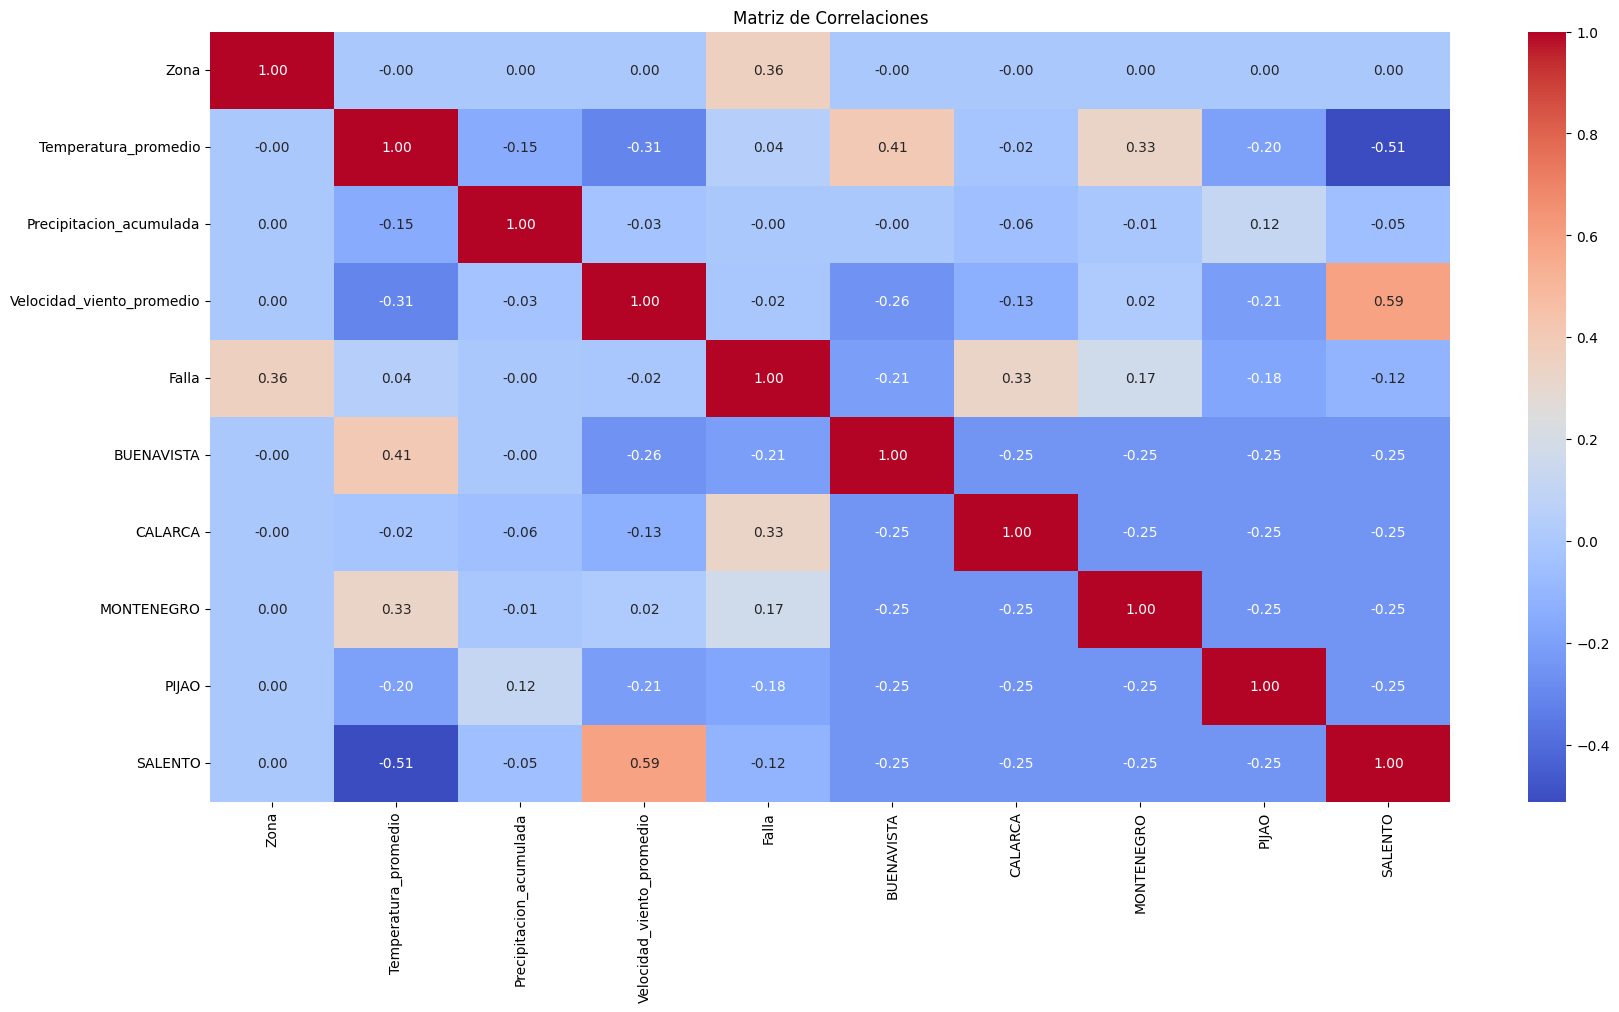

In [ ]:
#Grafico de matriz de correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlaciones')
plt.show()

Conclusiones Correlación entre **variables independientes**:

- Se observa una correlación (inversa / -) de: -0.31 entre las variables "Temperatura_promedio" y "Velocidad_viento_promedio".
- Se observa una correalción (directa / +) de 0.41 entre "BUENAVISTA" y "Temperatura_promedio".
- Se observa una correalción (inversa / -) de -0.51 entre "SALENTO" y "Temperatura_promedio".
- Se observa una correalción considerable (drirecta / +) de 0.59 entre "SALENTO" y "Velocidad_viento_promedio".

## **Reducción de dimensión**

A continuación se realiza una reducción de dimención a la matriz de correlación con el objetivo de interpretar cada una de las variables independientes con respecto a la variable dependiente: "Falla":

In [ ]:
matriz_corr['Falla_vs_variables'] = matriz_corr['Falla']
matriz_corr[['Falla_vs_variables']].sort_values(by= 'Falla_vs_variables', ascending = False).style.background_gradient(cmap='coolwarm')

,Falla_vs_variables
Falla,1.000000
Zona,0.358119
CALARCA,0.330436
MONTENEGRO,0.169502
Temperatura_promedio,0.044766
Precipitacion_acumulada,-0.000077
Velocidad_viento_promedio,-0.015866
SALENTO,-0.115016
PIJAO,-0.178181
BUENAVISTA,-0.206742


Conclusiones Correlación entre **variables Independientes** y la **Variable Dependiente**:

- Se observa una correlación (directa / +) de: 0.36 entre la variable independiente "Zona" y la variable dependiente: "Falla".
- Se observa una correlación (directa / +) de: 0.33 entre la variable independiente "Calarcá" y la variable dependiente: "Falla".
- Se observa una correalción (inverda / -) de 0.41 entre la variable independiente "BUENAVISTA" y la variable dependiente: "Falla".

**NOTA IMPORTANTE**: Aunque dieron correlaciones muy bajas entre las variables independientes climatologicas: **"Temperatura_promedio"**, **"Precipitacion_acumulada"** y **"Velocidad_viento_promedio"**; no se borrará ninguna de estas toda vez que NO se tienen más datos para realizar predicciones.

## **Balanceo de los datos**

En el siguiente apartado procedemos a realizar el balanceo de datos con el objetivo de nivel el desequilibrios en la distribución de clases, en pro de mejorar el rendimiento de los modelos, evitando sesgos en la evaluación y garantizando una predicción más justa y efectiva en todas las clases.

Procedemos a realizar balanceo de los datos con la categoría de número de **Fallas**, para la cual al revisar las cantidades de cada una de las categorias: 1 / 0 se tiene lo siguiente:

In [ ]:
pd.value_counts(df_proyecto['Falla'])

1    4732
0    4378
Name: Falla, dtype: int64

Observamos la cantidad de fallas según clasificación (1 -> Falla / 0 -> No falla) a través de un diagrama de barras vertical:

<Axes: xlabel='Falla', ylabel='count'>

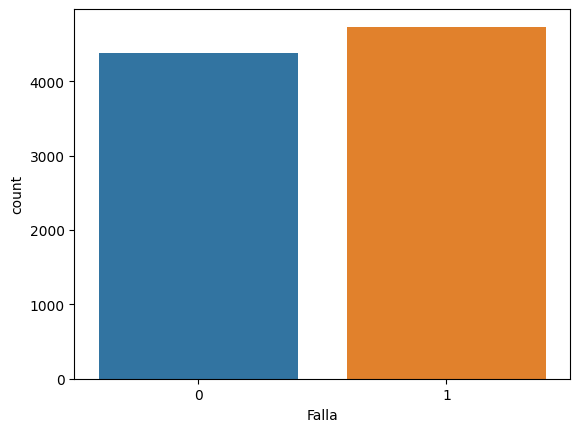

In [ ]:
sns.countplot(x='Falla', data= df_proyecto)

De la anterior imagen se logra evidenciar que en un porcentaje muy bajo la data se encuentra algo desbalanceada siendo la categoría de mayor predomicación el 1, indicando que hay más fallas que no fallas (0).

Por lo anterior se procede a realizar balanceo de las fallas usando un over_sampling en la categoria de No fallas (0) y llevandolo a nivelar proporcionalmente igual a las Si fallas (1) por cada uno de los municipios y procedemos a visualizar el resultado:

<Axes: >

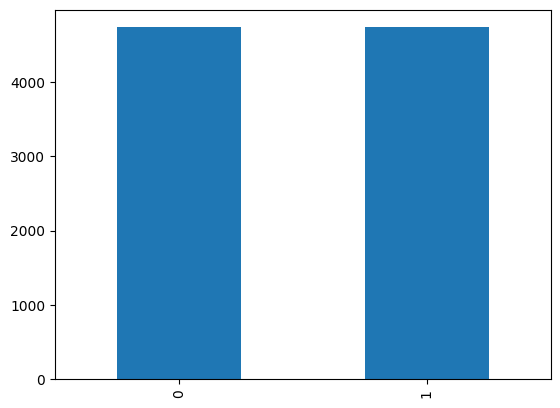

In [ ]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42, categorical_features = [0])
X_bal, Y_bal = sm.fit_resample(df_proyecto[['CALARCA',	'MONTENEGRO',	'Temperatura_promedio',	'Precipitacion_acumulada',	'Velocidad_viento_promedio',
                                            'SALENTO',	'Zona',	'PIJAO', 'BUENAVISTA']], df_proyecto['Falla'])

df_balanceado = pd.DataFrame({'CALARCA' : X_bal['CALARCA'],	'MONTENEGRO': X_bal['MONTENEGRO'],	'Temperatura_promedio': X_bal['Temperatura_promedio'],
                              'Precipitacion_acumulada': X_bal['Precipitacion_acumulada'],	'Velocidad_viento_promedio': X_bal['Velocidad_viento_promedio'],
                                            'SALENTO':X_bal['SALENTO'],	'Zona': X_bal['Zona'],	'PIJAO': X_bal['PIJAO'], 'BUENAVISTA':X_bal['BUENAVISTA'],
                            'Falla': Y_bal})
#Visualización del balanceo
pd.value_counts(df_balanceado['Falla']).plot(kind="bar")


Observamos el dataframe balanceado:

In [ ]:
df_balanceado

,CALARCA,MONTENEGRO,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,SALENTO,Zona,PIJAO,BUENAVISTA,Falla
0,0,0,22.595341,0.000000,0.484968,0,1,0,1,0
1,0,0,22.595341,0.000000,0.484968,0,0,0,1,0
2,0,0,22.728057,0.000000,0.428398,0,1,0,1,0
3,0,0,22.728057,0.000000,0.428398,0,0,0,1,0
4,0,0,20.961357,22.300000,0.494128,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
9459,0,0,19.753454,0.000000,0.630358,1,1,0,0,0
9460,0,0,20.195983,4.349086,0.135671,0,0,1,0,0
9461,0,0,19.714056,14.998962,0.237265,0,0,0,1,0
9462,0,0,20.179602,18.858039,0.474971,0,1,1,0,0


Depues de realizar el balanceo de los datos, observamos que obtenemos un dataframe final con 9.465 registros y conservamos las mismas 10 variables pero ahora con una data balanceada.

## **Transformación de los datos**

A continuación realizamos estandarización de datos con el objetivo de mejorar la calidad de los datos, facilitar el análisis, el modelado y la interpretación, y garantizar que los algoritmos predictivos y estadísticos funcionen de manera eficiente y efectiva:

A continuación procedemos a realizar estandarización haciendo uso de la librería de StandardScaler de Python para las variables climatologicas: **Temperatura_promedio**, **Precipitacion_acumulada**, y **Velocidad_viento_promedio**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador estándar
scaler = StandardScaler()

# Selecciona solo las columnas numéricas
columnas_numericas = ['Temperatura_promedio', 'Precipitacion_acumulada', 'Velocidad_viento_promedio']

# Normaliza las columnas numéricas
df_balanceado[columnas_numericas] = scaler.fit_transform(df_balanceado[columnas_numericas])

Observamos el dataset en su versión final balanceado y tranformado (Estandarizado):

In [ ]:
df_balanceado

,CALARCA,MONTENEGRO,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,SALENTO,Zona,PIJAO,BUENAVISTA,Falla
0,0,0,1.440606,-0.448038,-0.463076,0,1,0,1,0
1,0,0,1.440606,-0.448038,-0.463076,0,0,0,1,0
2,0,0,1.507753,-0.448038,-0.642771,0,1,0,1,0
3,0,0,1.507753,-0.448038,-0.642771,0,0,0,1,0
4,0,0,0.613902,1.478791,-0.433978,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
9459,0,0,0.002771,-0.448038,-0.001241,1,1,0,0,0
9460,0,0,0.226665,-0.072256,-1.572623,0,0,1,0,0
9461,0,0,-0.017163,0.847946,-1.249910,0,0,0,1,0
9462,0,0,0.218378,1.181389,-0.494829,0,1,1,0,0


Finalmente procedemos a almacenar el dataser tratado en los apartados anteriores, dataset próximo a ser fuente e insumo para análisis de los modelos predictivos:

In [ ]:
# Guardamos archivo CSV
from google.colab import files

df_balanceado.to_csv('data_integrada_preproceada.csv', index=False)